In [2]:
# make the jupyter notebook interactive
%matplotlib widget
from BIOViewer import ContinuousViewer
from BIOViewer import ContinuousConfig
import numpy as np

# BIOViewer demo

This demo walks you trough different features of the BIOViewer
1. Single module: How to construct a basic viewer
2. Timestamps: how to construct a viewer that allows you to hop trough timestamps
3. Multiwindow: How to build a viewer that displays multiple signals 


# Single module

You first need to generate a configuration, which will then be turned into a viewer. 

the most basic information is:
- a numpy file of shape [channels, ts]
- channel names
- signal frequency

it allows you to scroll left and right trough the image and save the image to the specified location by pressing the letter 'z'

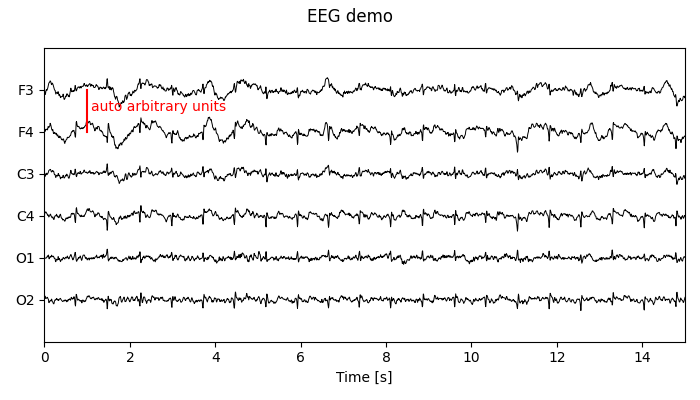

In [2]:
signal = np.load('example.npy')
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fs = 128

signal0 = ContinuousConfig(signal,Fs,display_channels)
viewer = ContinuousViewer(signal_configs=[signal0],path_save='Figures',title='EEG demo')

# Timestamps
you can specify timestamps in the viewer
using "n" and "b" you can jump to the timestamps

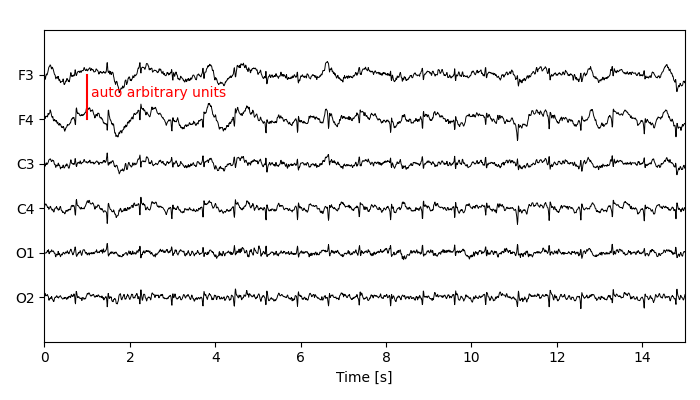

In [3]:
signal =np.load('example.npy')
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
timestamps = [16, 17, 22]
Fs = 128

config = ContinuousConfig(signal,Fs,display_channels)
viewer = ContinuousViewer(signal_configs=[config],timestamps=timestamps)

# Scaling
You can manually set the scale of a signal or let the viewer do it for you. \
To do so manually, set the scale factor (default = 'auto') \
Also, you can display the unit system of your data


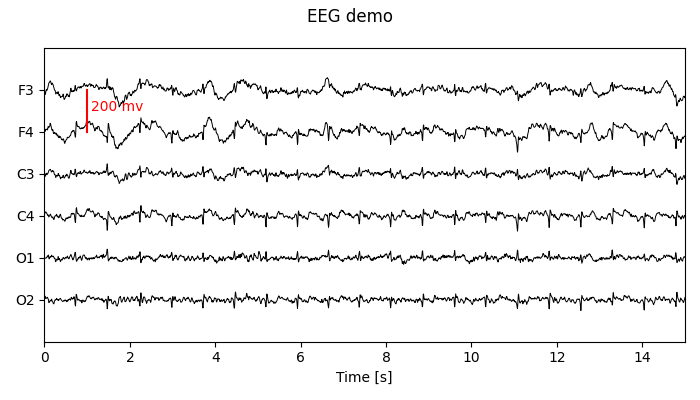

In [4]:
signal = np.load('example.npy')
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fs = 128

signal0 = ContinuousConfig(signal,Fs,display_channels,scale=200,unit='mv')
viewer = ContinuousViewer(signal_configs=[signal0],path_save='Figures',title='EEG demo')

# Multi window

this is where the BIOViewer shows most utility. \
You can build a multiwindow viewer! \
this is useful when ...
* parts of the signal are stored at different locations
* the signals have different frequencies
* you want to display the signal with different functions applied


to show you how it works we are going to plot the same signal twice

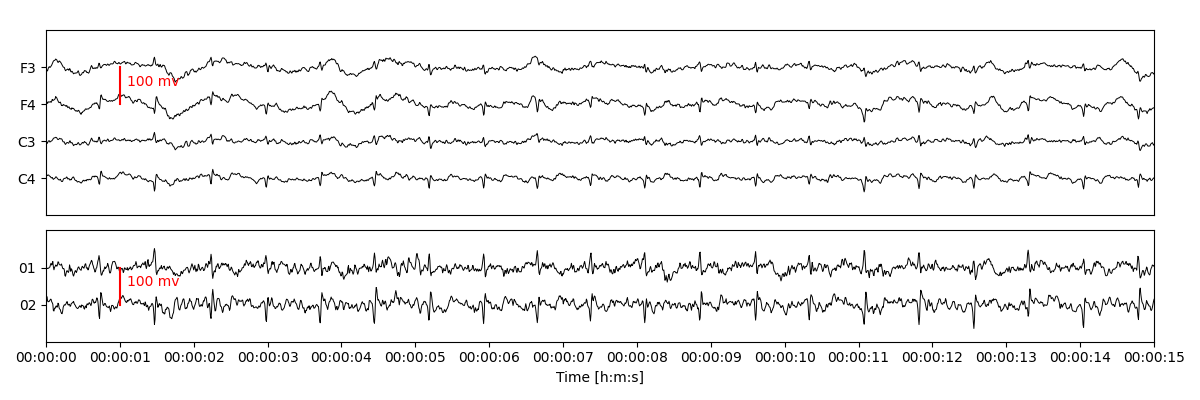

In [5]:
# display 1
signal0 =np.load('example.npy')[:4,:]
display_channels = ['F3', 'F4', 'C3', 'C4']
Fs = 128
signal_config0 = ContinuousConfig(signal0,Fs,display_channels,t_ticks=False,scale = 100,unit='mv')

signal1 =np.load('example.npy')[4:,:]
display_channels = ['01','02']
Fs = 128
signal_config1 = ContinuousConfig(signal1,Fs,display_channels,scale=100,unit='mv',real_time=True)

ContinuousViewer(signal_configs=[signal_config0,signal_config1],figsize=(12,4))